In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

In [2]:
ds = pd.read_csv('movies_prerelease.csv')

In [3]:
ds

,Movie,Target,Budget,BoxOffice,Rating,Votes,Year,"rat_(0, 2]","rat_(2, 4]","rat_(4, 6]",...,s_Zakir Hussain,s_Zareen Khan,s_Zarina Wahab,s_Zayed Khan,s_Zeenat Aman,s_Zenia Starr,s_Zenobia Shroff,s_Zohra Sehgal,s_Zoya Afroz,s_Zoya Hussain
0,Batti Gul Meter Chalu,2,50.0,37.00,6.3,1552,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dangal,6,90.0,370.00,8.5,105480,2016,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Manmarziyaan,3,30.0,26.00,7.0,1836,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sui Dhaaga: Made in India,4,50.0,55.00,6.9,1342,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Stree,6,25.0,127.00,8.3,7801,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Manto,2,8.0,3.00,7.9,622,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Pataakha,2,20.0,6.50,7.7,392,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3 Idiots,6,55.0,202.00,8.4,282358,2009,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,PK,6,85.0,340.00,8.2,127703,2014,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Padman,5,40.0,81.00,8.1,10917,2018,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
data = ds.drop(columns=['Movie', 'Budget', 'BoxOffice', 'Rating', 'Votes', 'Year', 'rat_(0, 2]', 'rat_(2, 4]', 'rat_(4, 6]',  'rat_(6, 8]', 'rat_(8, 10]']).values
#data = ds.drop(columns=['Movie', 'BoxOffice', 'Rating', 'Votes', 'Year']).values
print(data.shape)

(703, 1506)


In [73]:
data

array([[2, 0, 0, ..., 0, 0, 0],
       [6, 1, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [74]:
import itertools
from sklearn import svm
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [75]:
## 70-30 Split randomized
split = int(0.7*data.shape[0])
np.random.shuffle(data)
X_train = data[:split, 1:]
Y_train = data[:split, 0]

X_test = data[split:, 1:]
Y_test = data[split:, 0]

print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(492, 1505) (492,)
(211, 1505) (211,)


0.27488151658767773


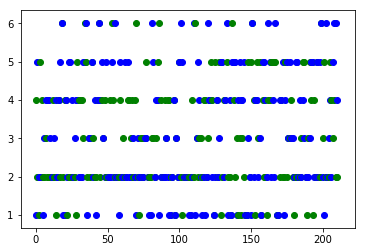

Normalized confusion matrix
[[0.25806452 0.41935484 0.03225806 0.12903226 0.06451613 0.09677419]
 [0.08695652 0.4057971  0.14492754 0.30434783 0.05797101 0.        ]
 [0.         0.39130435 0.30434783 0.04347826 0.26086957 0.        ]
 [0.14285714 0.28571429 0.11428571 0.22857143 0.22857143 0.        ]
 [0.08108108 0.43243243 0.13513514 0.18918919 0.08108108 0.08108108]
 [0.         0.3125     0.125      0.125      0.1875     0.25      ]]


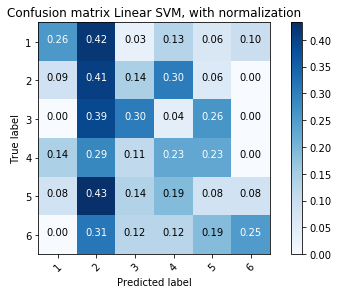

In [80]:
from sklearn.externals import joblib
svm_model_linear = svm.SVC(kernel = 'linear', C = 5).fit(X_train, Y_train)
svm_predictions = svm_model_linear.predict(X_test)
 
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, Y_test)
print(accuracy)
# creating a confusion matrix
cm = confusion_matrix(Y_test, svm_predictions)

for ix in range(svm_predictions.shape[0]):
    plt.scatter(ix, svm_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Linear SVM, with normalization')

pickle.dump(svm_model_linear, open('prerelease_svm.pkl', 'wb'))

In [61]:
loaded_model = pickle.load(open('prerelease_svm.pkl', 'rb'))
type(loaded_model)
result = loaded_model.predict(X_test)
print(result)

[2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 4. 2. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2.
 2. 4. 2. 2. 2. 2. 2. 4. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 4.
 2. 2. 2. 2. 2. 4. 2. 2. 2. 2. 2. 2. 2. 4. 2. 2. 2. 4. 2.]


0.26066350710900477


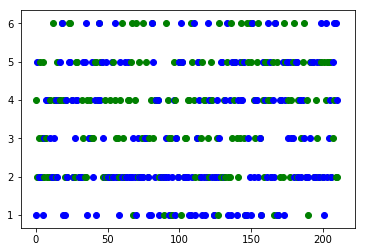

Normalized confusion matrix
[[0.12903226 0.16129032 0.12903226 0.22580645 0.19354839 0.16129032]
 [0.07246377 0.33333333 0.15942029 0.2173913  0.11594203 0.10144928]
 [0.04347826 0.17391304 0.2173913  0.2173913  0.2173913  0.13043478]
 [0.         0.28571429 0.08571429 0.22857143 0.37142857 0.02857143]
 [0.         0.2972973  0.21621622 0.16216216 0.27027027 0.05405405]
 [0.0625     0.125      0.0625     0.3125     0.125      0.3125    ]]


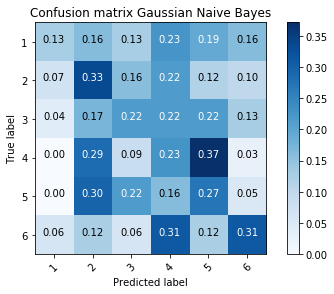

In [81]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, Y_train)
gnb_predictions = gnb.predict(X_test)
 
# accuracy for X_test
accuracy = gnb.score(X_test, Y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(Y_test, gnb_predictions)

for ix in range(gnb_predictions.shape[0]):
    plt.scatter(ix, gnb_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Gaussian Naive Bayes')

pickle.dump(gnb, open('prerelease_naivebayes.pkl', 'wb'))

0.26066350710900477


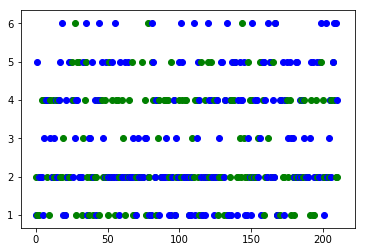

Normalized confusion matrix
[[0.25806452 0.4516129  0.03225806 0.19354839 0.06451613 0.        ]
 [0.13043478 0.46376812 0.04347826 0.27536232 0.07246377 0.01449275]
 [0.2173913  0.39130435 0.         0.26086957 0.08695652 0.04347826]
 [0.14285714 0.4        0.02857143 0.28571429 0.11428571 0.02857143]
 [0.10810811 0.37837838 0.08108108 0.32432432 0.10810811 0.        ]
 [0.1875     0.3125     0.0625     0.125      0.25       0.0625    ]]


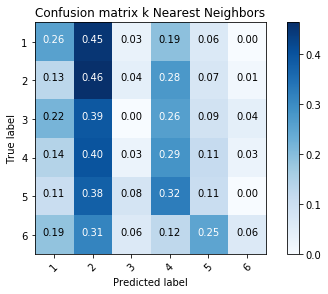

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = knn.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(Y_test, knn_predictions)

for ix in range(knn_predictions.shape[0]):
    plt.scatter(ix, knn_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix k Nearest Neighbors')

pickle.dump(knn, open('prerelease_knn.pkl', 'wb'))

0.26540284360189575


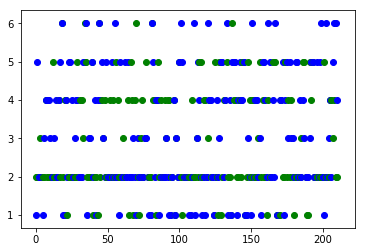

Normalized confusion matrix
[[0.19354839 0.64516129 0.         0.09677419 0.03225806 0.03225806]
 [0.13043478 0.43478261 0.07246377 0.27536232 0.08695652 0.        ]
 [0.04347826 0.39130435 0.2173913  0.08695652 0.26086957 0.        ]
 [0.08571429 0.48571429 0.         0.22857143 0.2        0.        ]
 [0.05405405 0.51351351 0.05405405 0.21621622 0.10810811 0.05405405]
 [0.         0.375      0.0625     0.1875     0.1875     0.1875    ]]


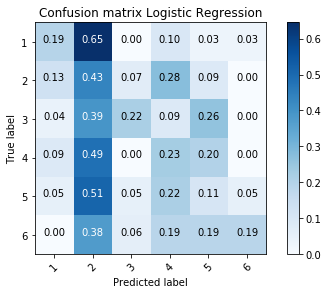

In [85]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = lr.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
lr_predictions = lr.predict(X_test) 
cm = confusion_matrix(Y_test, lr_predictions)

for ix in range(lr_predictions.shape[0]):
    plt.scatter(ix, lr_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Logistic Regression')

pickle.dump(lr, open('prerelease_logreg.pkl', 'wb'))

0.3080568720379147


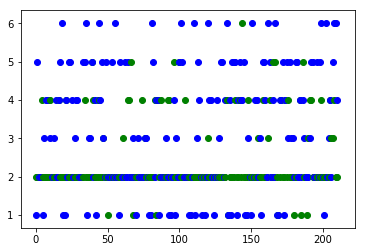

Normalized confusion matrix
[[0.06451613 0.90322581 0.         0.03225806 0.         0.        ]
 [0.05797101 0.75362319 0.05797101 0.11594203 0.01449275 0.        ]
 [0.04347826 0.69565217 0.08695652 0.17391304 0.         0.        ]
 [0.02857143 0.65714286 0.         0.2        0.08571429 0.02857143]
 [0.         0.72972973 0.02702703 0.18918919 0.05405405 0.        ]
 [0.         0.5625     0.125      0.25       0.0625     0.        ]]


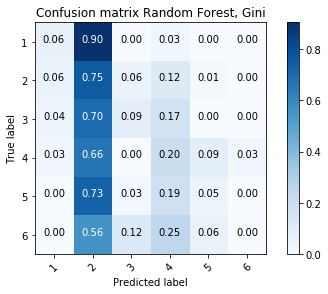

In [86]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=40, warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Random Forest, Gini')

pickle.dump(rf, open('prerelease_randfor.pkl', 'wb'))

0.2985781990521327


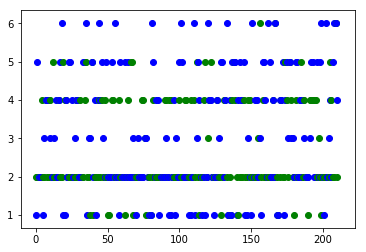

Normalized confusion matrix
[[0.12903226 0.64516129 0.         0.16129032 0.06451613 0.        ]
 [0.07246377 0.62318841 0.02898551 0.2173913  0.05797101 0.        ]
 [0.13043478 0.47826087 0.04347826 0.26086957 0.04347826 0.04347826]
 [0.05714286 0.57142857 0.         0.28571429 0.08571429 0.        ]
 [0.05405405 0.48648649 0.         0.37837838 0.08108108 0.        ]
 [0.0625     0.5625     0.0625     0.125      0.0625     0.125     ]]


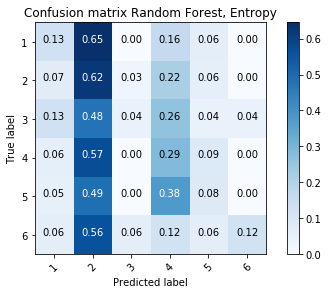

In [109]:
rf = RandomForestClassifier(n_estimators=20, criterion='entropy', warm_start=True).fit(X_train, Y_train)
 
# accuracy on X_test
accuracy = rf.score(X_test, Y_test)
print (accuracy)
 
# creating a confusion matrix
rf_predictions = rf.predict(X_test) 
cm = confusion_matrix(Y_test, rf_predictions)

for ix in range(rf_predictions.shape[0]):
    plt.scatter(ix, rf_predictions[ix], c='g')
    plt.scatter(ix, Y_test[ix], c='b')
plt.show()
plot_confusion_matrix(cm, classes=[1,2,3,4,5,6], normalize=True, title='Confusion matrix Random Forest, Entropy')

pickle.dump(rf, open('prerelease_randfor2.pkl', 'wb'))

In [87]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


In [95]:
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)
print(Y_train.shape, y_train.shape)

(492,) (492, 7)


In [105]:
model = Sequential()
model.add(Dense(800, input_shape=(1505,)))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dense(7))
model.add(Activation('softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 800)               1204800   
_________________________________________________________________
activation_11 (Activation)   (None, 800)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 200)               160200    
_________________________________________________________________
activation_12 (Activation)   (None, 200)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                10050     
_________________________________________________________________
activation_13 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 357       
__________

In [106]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [107]:
model.fit(X_train, y_train, batch_size=10, epochs=50, validation_data=[X_test, y_test])

Train on 492 samples, validate on 211 samples
Epoch 1/50
492/492 [==============================] - 3s 6ms/step - loss: 1.7721 - acc: 0.2703 - val_loss: 1.7037 - val_acc: 0.3128
Epoch 2/50
492/492 [==============================] - 2s 4ms/step - loss: 1.2946 - acc: 0.5447 - val_loss: 1.8001 - val_acc: 0.2796
Epoch 3/50
492/492 [==============================] - 2s 4ms/step - loss: 0.4026 - acc: 0.9309 - val_loss: 2.2146 - val_acc: 0.2417
Epoch 4/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0688 - acc: 0.9837 - val_loss: 2.5343 - val_acc: 0.2891
Epoch 5/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0302 - acc: 0.9959 - val_loss: 2.6563 - val_acc: 0.2796
Epoch 6/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 2.7736 - val_acc: 0.2796
Epoch 7/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0022 - acc: 1.0000 - val_loss: 2.8174 - val_acc: 0.2796
Epoch 8/50
492/492 [==========